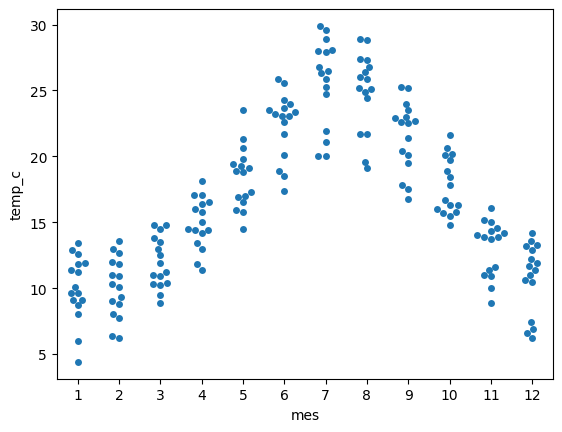

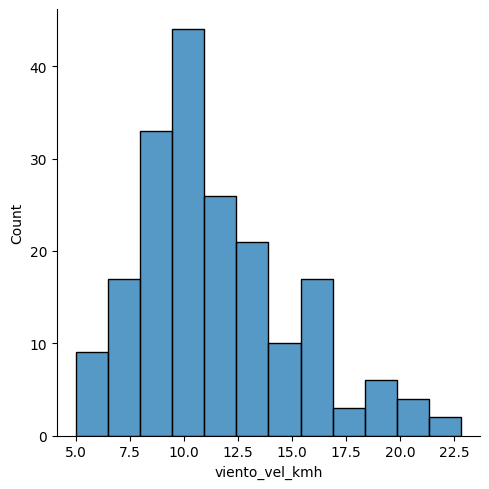

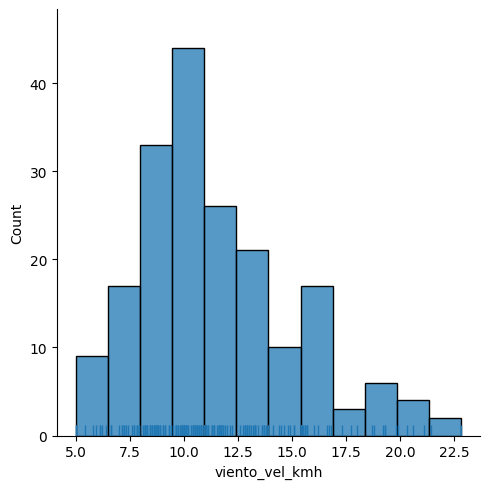

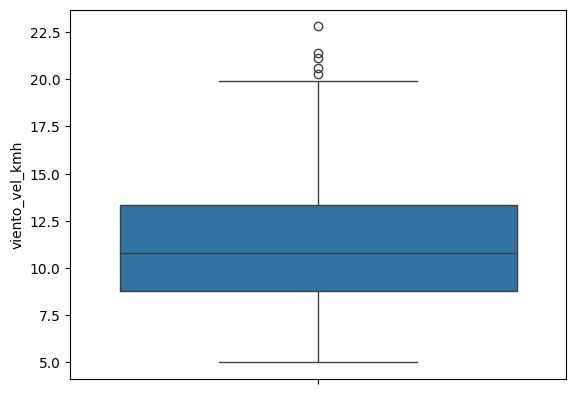

FileNotFoundError: [Errno 2] No such file or directory: '../Datasets/imdb_movie.csv'

In [1]:
#VISUALIZACIÓN DE DATOS: SEABORN
#cargamos las librerias NumPy y Pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#cargamos nuestros datos
meteo_mes = pd.read_csv("./U09_datasets/meteo_mes_agg.csv", sep = ";")
#ver las temperaturas por mes
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes)
plt.show()
#Descubriendo la distribución de los datos
sns.displot(meteo_mes['viento_vel_kmh'])
plt.show()
#añadir marcadores para ver el número de observaciones de cada valor del eje X
sns.displot(meteo_mes['viento_vel_kmh'], kde=False, rug=True)
plt.show()
#diagrama de caja/boxplot
sns.boxplot(y='viento_vel_kmh', data=meteo_mes)
plt.show()
#Visualizando relaciones entre variables
movies = pd.read_csv("../Datasets/imdb_movie.csv")#NO LO HEMOS DESCARGADO AUN !!!!!!
#numero de likes e ingresos brutos de taquilla
sns.jointplot('movie_facebook_likes', 'gross', data=movies)
plt.show()
#transformacion de variables usando logaritmos
movies_fb = movies.loc[movies['movie_facebook_likes'] > 0,
                       ['movie_facebook_likes', 'gross']]
sns.jointplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb))
#mostrat densidades de probabilidad estimadas
sns.joinplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb), kind="kde")
#modelo de regresion lineal
sns.regplot('movie_facebook_likes', 'gross', data = np.log10(movies_fb))
#Comparando niveles o categorias
#variables categoricas
sns.swarmplot(x = 'mes', y = 'temp_c', data = meteo_mes, hue = 'ciudad') #coloree los puntos en funcion a la ciudad
#boxplot para distribucion por niveles o categorias
sns.boxplot(x='mes', y='temp_c', data=meteo_mes)
sns.boxplot(x='mes', y='temp_c', hue='año', data=meteo_mes)
#grafico de violin
sns.violinplot(x = 'mes', y = 'temp_c', hue = 'año', data = meteo_mes)
#partir cada violin, y que cada parte aploque a un nivel
sns.violinplot(x='mes', y ='temp_c', hue='año', split=True, data=meteo_mes)
#grafico de barras
sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes)
#graficos multiples organizados en cuadriculas o rejillas
meteo_bvz = meteo_mes[meteo_mes['ciudad'].isin(['Bilbao', 'Valencia', 'Zaragoza'])]
#filas cuantos años y columnas como ciudades
sns.FacetGrid(meteo_bvz, row='año',
col='ciudad').map(sns.pointplot, "mes", "temp_c")
#si la pintas directamente, te mostrara la grafica sin los datos
sns.FacetGrid(meteo_bvz, row='año', col='ciudad')
#usar color o forma para reprensentar dimensiones adicionales
meteo_bvz_long = pd.melt(meteo_bvz, #pasar los datos en modo ancho
id_vars=['año', 'mes', 'ciudad'],
value_vars=['temp_c', 'viento_vel_kmh'],
var_name='variable', value_name='valor')
#cada fila la variable meteo y con el color el año
sns.FacetGrid(meteo_bvz_long, row='variable', col='ciudad',
hue='año').map(sns.pointplot, 'mes', 'valor')
#añadir estilos
sns.set_style('darkgrid')
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes)
#consultar la configuracion actual
sns.axes_style()
#Tamaño de la figura
#ajustar el tamaño
sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes).figure.set_size_inches(10,6)
#Colores (configurar paleta)
with sns.color_palette("husl", 2):
    sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes)
#definir nuestros propios colores
with sns.xkcd_palette(["red", "blue"]):
    sns.barplot(x='mes', y='temp_c', hue='año', data=meteo_mes)
#variables continuas (una escala con un color base, graduando la saturacion)
with sns.light_palette("muted purple", input="xkcd"):
    sns.joinplot('movie_facebook_likes', 'gross', data=np.log10(movies_fb), kind="kde")
#incrementar el contraste, graduando el tono y el brillo
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.joinplot('movie_facebook_likes', 'gross', data= np.log10(movies_fb), kind="kde", cmap=cmap)
#Titulos (para fijar titulos)
sns.swarmplot(x='mes', y='temp_c', data=meteo_mes).set_title("Temperaturas mensuales observadas",
frontsize=14)
#Ejes modificar etiquetas de cada uno de los ejes
sns.swarmplot(x='mes', y='temp_c',
data=meteo_mes).set(xlabel="Mes", ylabel="Temperatura (C)")